# Chapter 4: Training Models

So far we have treated machine learning models and their training algorithms
mostly like black boxes. If you went through some of the exercises in the
previous chapters, you may have been surprised by how much you can get
done without knowing anything about what’s under the hood: you optimized
a regression system, you improved a digit image classifier, and you even built
a spam classifier from scratch, all without knowing how they actually work.
Indeed, in many situations you don’t really need to know the implementation
details. <br>
However, having a good understanding of how things work can help you
quickly home in on the appropriate model, the right training algorithm to use,
and a good set of hyperparameters for your task. Understanding what’s under
the hood will also help you debug issues and perform error analysis more
efficiently. Lastly, most of the topics discussed in this chapter will be
essential in understanding, building, and training neural networks.

## Linear Regression

A linear model makes a prediction by simply computing a
weighted sum of the input features, plus a constant called the bias term (also
called the intercept term):

$$ \hat{y} = {\theta_0}*0 + {\theta_1}*x_1 + {\theta_2}*x_2 +...+ {\theta_n}*x_n$$

In this equation:
- ŷ is the predicted value.
- n is the number of features.
- x is the i feature value.
- θ is the j model parameter, including the bias term θ and the feature
weights θ , θ , ⋯, θ .

OK, that’s the linear regression model—but how do we train it? Well, recall
that training a model means setting its parameters so that the model best fits
the training set. For this purpose, we first need a measure of how well (or
poorly) the model fits the training data. In Chapter 2 we saw that the most
common performance measure of a regression model is the **root mean square
error**. Therefore, to train a linear regression model, we need to
find the value of θ that minimizes the RMSE. In practice, it is simpler to
minimize the **mean squared error** (MSE) than the RMSE, and it leads to the
same result (because the value that minimizes a positive function also
minimizes its square root).

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$



### Normal Equation

To find the value of θ that minimizes the MSE, there exists a closed-form
solution—in other words, a mathematical equation that gives the result
directly. This is called the Normal equation:
$$\hat{\theta} = (X^T X)^{-1} X^T y$$

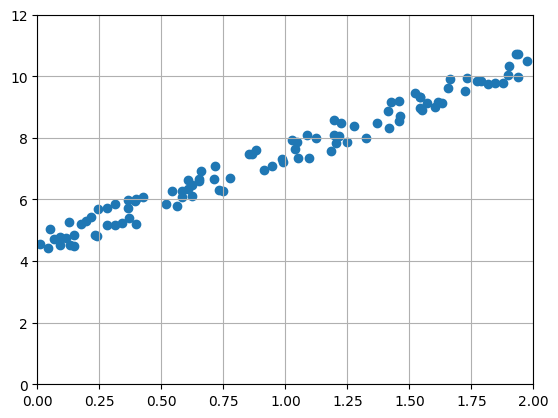

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # of instances
X = 2*np.random.rand(m, 1) # column vector
y = 4 + 3*X + np.random.rand(m, 1) # column vector

plt.axis([0,2,0,12])
plt.grid()
plt.scatter(X, y)
plt.show()

Now let's compute $\hat{\theta}$ using the Normal equation. We will use the inv()
function from NumPy’s linear algebra module (np.linalg) to compute the
inverse of a matrix, and the dot() method for matrix multiplication:

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @X_b) @ X_b.T @ y